## TITANIC SURVIVAL PREDICTION

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [58]:
train = pd.read_csv('C:/Users/Computer Care/Downloads/archive/tested.csv')

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
#Data Exploration & Preprocessing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [61]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
train.isnull().sum() / train.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [63]:
train.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [64]:
train.duplicated().sum()

0

In [65]:
mean_age_miss = train[train["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = train[train["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = train[train["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = train[train["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print("Miss: ",mean_age_miss)
print("Mrs: ",mean_age_mrs)
print("Mr: ",mean_age_mr)
print("Master: ",mean_age_master)

Miss:  22.0
Mrs:  39.0
Mr:  34.0
Master:  7.0


In [66]:
def filling_age(name_age): 
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age
train['Age'] = train[['Name', 'Age']].apply(filling_age,axis=1)

In [67]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

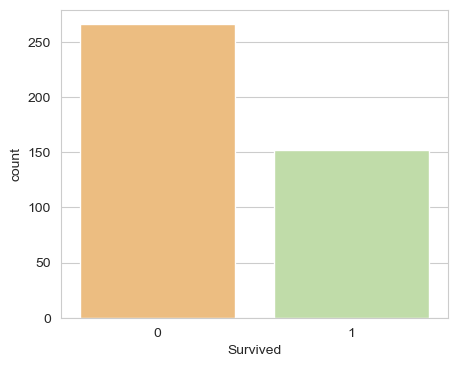

In [68]:
plt.figure(figsize=(5, 4))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='Spectral')

<Axes: xlabel='Survived', ylabel='count'>

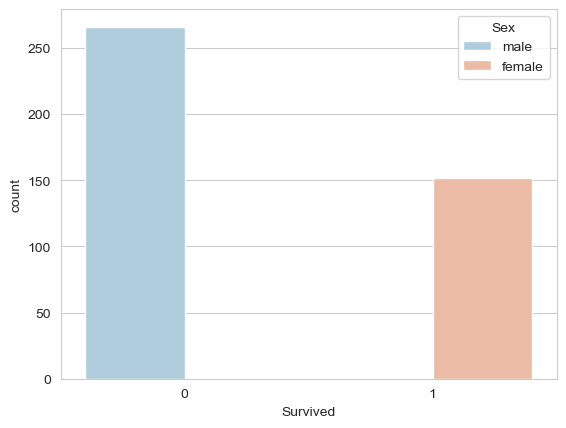

In [69]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

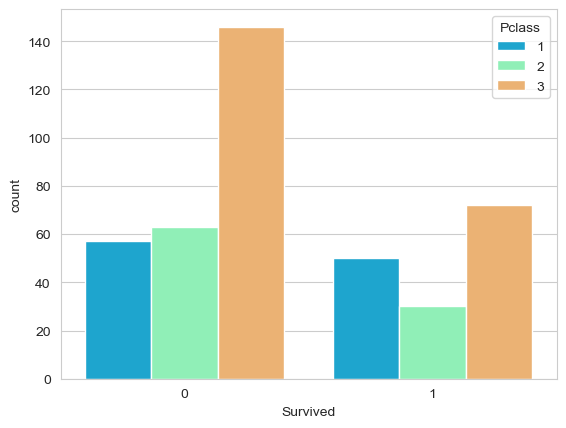

In [70]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

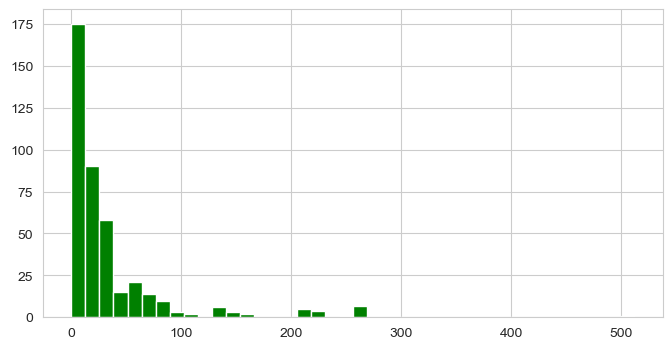

In [71]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Age', ylabel='Count'>

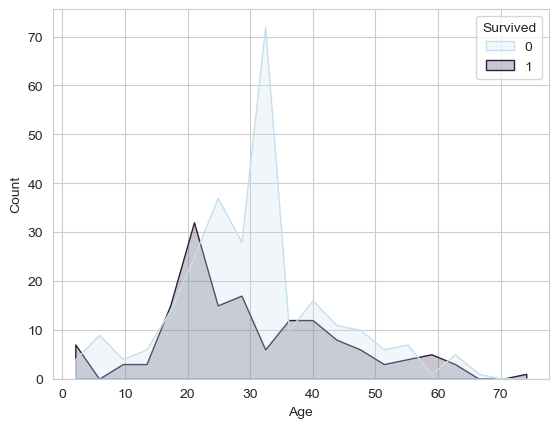

In [72]:
sns.histplot(data=train, x='Age', hue='Survived', element="poly", palette='ch:s=.25,rot=-.25')

<Axes: xlabel='Pclass', ylabel='Age'>

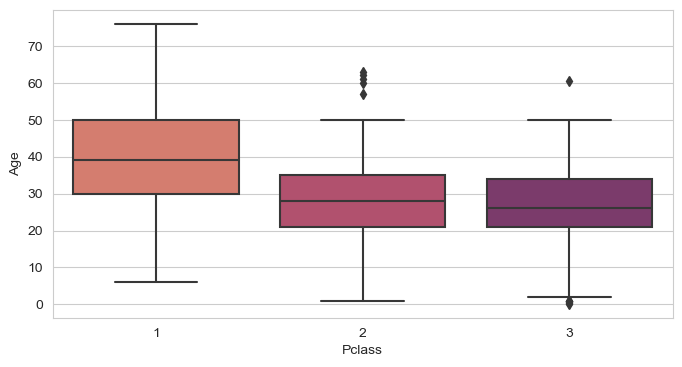

In [73]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='flare')

In [74]:
train.dropna(inplace = True)

In [75]:
train.drop(['Cabin'], axis=1, inplace=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

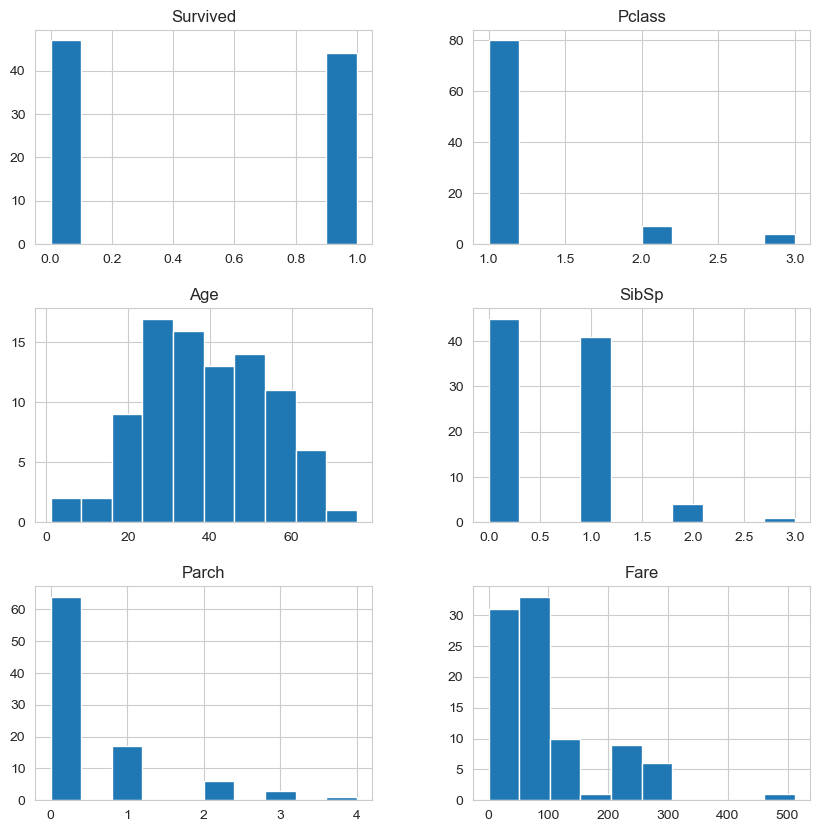

In [76]:
train.hist(figsize=(10, 10))

In [77]:
# encoding
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head(5)

,male
12,0
14,0
24,0
26,0
28,1


In [78]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head()

,Q,S
12,0,1
14,0,1
24,0,0
26,0,0
28,0,1


In [79]:
Pclass = pd.get_dummies(train['Pclass'], drop_first = True)
Pclass.head()

,2,3
12,0,0
14,0,0
24,0,0
26,0,0
28,0,0


In [80]:
t_data = pd.concat([train,sex, embark,Pclass],axis = 1)
t_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
12,1,1,female,23.0,1,0,82.2667,S,0,0,1,0,0
14,1,1,female,47.0,1,0,61.1750,S,0,0,1,0,0
24,1,1,female,48.0,1,3,262.3750,C,0,0,0,0,0
26,1,1,female,22.0,0,1,61.9792,C,0,0,0,0,0
28,0,1,male,41.0,0,0,30.5000,S,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0,1,male,43.0,1,0,27.7208,C,1,0,0,0,0
405,0,2,male,20.0,0,0,13.8625,C,1,0,0,1,0
407,0,1,male,50.0,1,1,211.5000,C,1,0,0,0,0
411,1,1,female,37.0,1,0,90.0000,Q,0,1,0,0,0


In [81]:
t_data.drop(['Sex','Embarked','Pclass'],axis= 1, inplace = True)
t_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
12,1,23.0,1,0,82.2667,0,0,1,0,0
14,1,47.0,1,0,61.1750,0,0,1,0,0
24,1,48.0,1,3,262.3750,0,0,0,0,0
26,1,22.0,0,1,61.9792,0,0,0,0,0
28,0,41.0,0,0,30.5000,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
404,0,43.0,1,0,27.7208,1,0,0,0,0
405,0,20.0,0,0,13.8625,1,0,0,1,0
407,0,50.0,1,1,211.5000,1,0,0,0,0
411,1,37.0,1,0,90.0000,0,1,0,0,0


In [82]:
t_data.columns = t_data.columns.astype(str)

In [83]:
#Training the Model
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(t_data.drop('Survived',axis=1), 
                                                    t_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [85]:
#Model Building
from sklearn.linear_model import LogisticRegression

In [86]:
model=LogisticRegression()

In [87]:
model.fit(X_train, y_train)

F:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
predictions = model.predict(X_test)

In [89]:
#Accuracy
from sklearn.metrics import accuracy_score

In [90]:
a = accuracy_score(y_test, predictions)
print("The accuracy is {}".format(a))

The accuracy is 1.0
